In [ ]:
import matplotlib.pyplot as plt
import matplotlib

r1 = 11
g1 = 6
b1 = 8

r2 = 10
g2 = 5
b2 = 10

r3 = 8
g3 = 5
b3 = 6

# Задача №1. Проектирование Call-центра.

Известно, что среднее время между звонками клиентов составляет Tc = R1, секунд, а среднее время обслуживания Ts = R1+G1+B1+R2+G2+B2 секунд. Все потоки случайных событий считать пуассоновскими. Если все операторы заняты, звонок теряется.


#1.1
Рассмотреть систему без очереди. Построить графики от числа операторов:
* вероятности отказа (вплоть до обеспечения отказов менее 1%);
* математического ожидания числа занятых операторов;
* коэффициента загрузки операторов.

In [ ]:
Tc = r1
Ts = r1+g1+b1+r2+g2+b2

alpha = 1/Tc
mu = 1/Ts

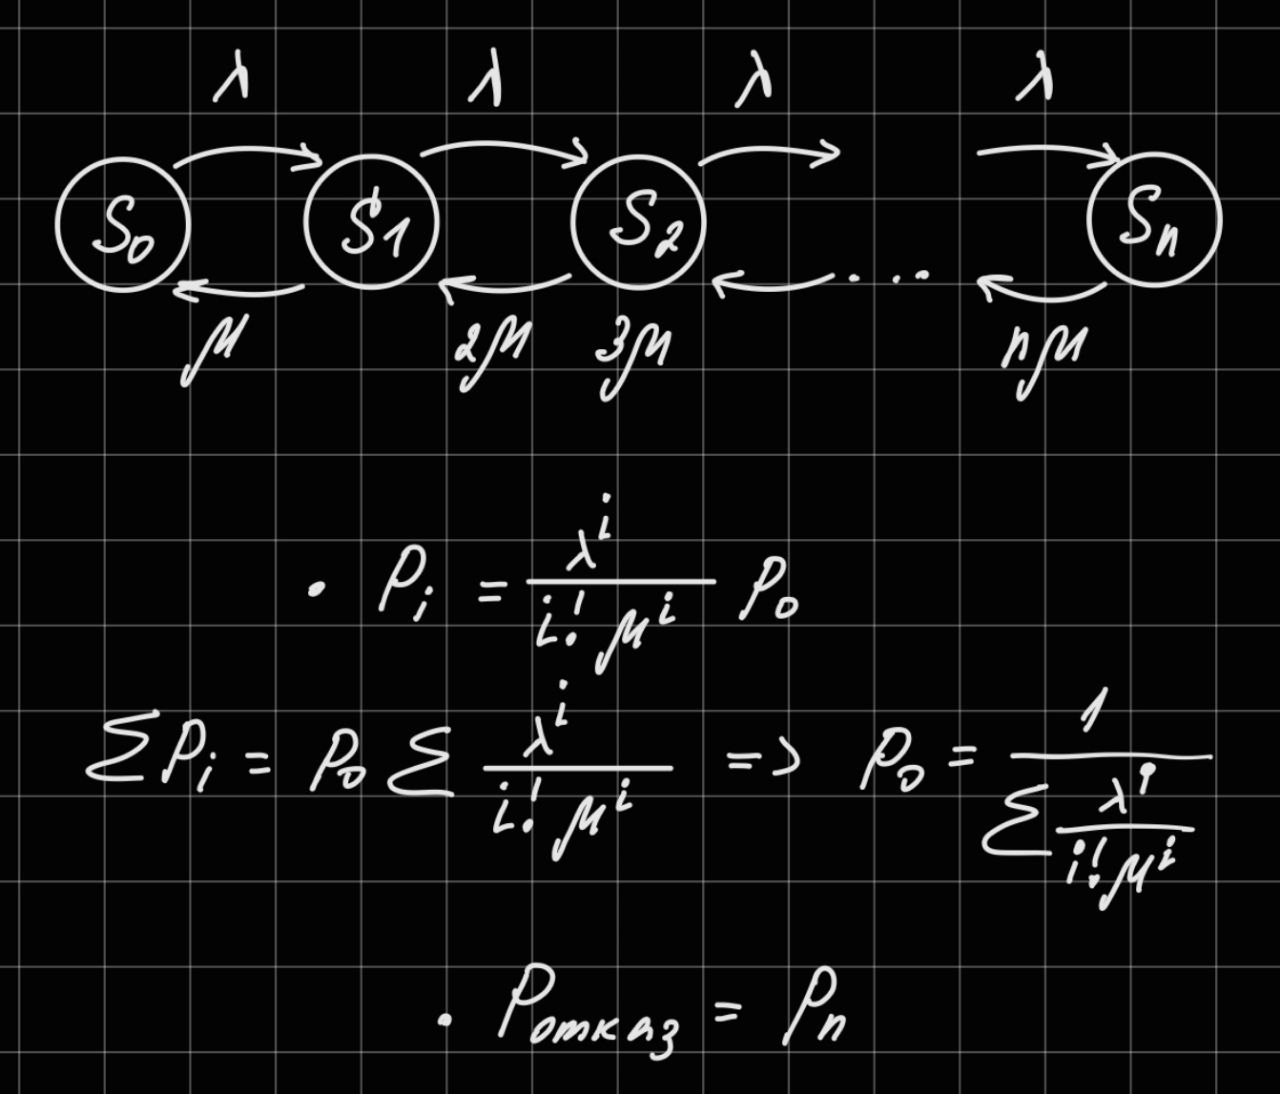

In [ ]:
def fact(n):
    if n == 0: return 1
    else:
        a = 1;
        for i in range(1,n+1): a *= i;
        return a

def p_0_noQeueue(n):
    summ = 0
    for i in range(n+1):
        summ += alpha**i / (fact(i)* mu**i)
    return 1/summ

def pi_no_queue(alpha, mu, i):

    p0 = p_0_noQeueue(n)
    return ((alpha**i * p0)/(fact(i) * mu**i))

In [ ]:
print("n\t\tP0\t\tPn = P_refuse\n__________________________________________________")

criteriy = False
n = 1

p_r = []
N = []

while(criteriy == False):
    p_ref = pi_no_queue(alpha, mu, n)

    N.append(n)
    p_r.append(p_ref)

    print(n, '\t', p_0_noQeueue(n), '\t', p_ref)

    if(p_ref < 0.01):
        criteriy = True
    n+=1



n		P0		Pn = P_refuse
__________________________________________________
1 	 0.180327868852459 	 0.8196721311475408
2 	 0.06298802706923477 	 0.650702758979698
3 	 0.031717410817122475 	 0.49645333735791497
4 	 0.020277709938677047 	 0.3606757482319387
5 	 0.015270658775258104 	 0.24692389715411872
6 	 0.012864230113505045 	 0.15758512433347102
7 	 0.011670056535501393 	 0.09282899695256473
8 	 0.011085372441960055 	 0.050101222026018036
9 	 0.010811794602623813 	 0.02467917435960044
10 	 0.010691855436916852 	 0.011093363323592323
11 	 0.010643067250188026 	 0.004563116946042082


Text(0.5, 1.0, 'Зависимость вероятности отказа от числа операторов')

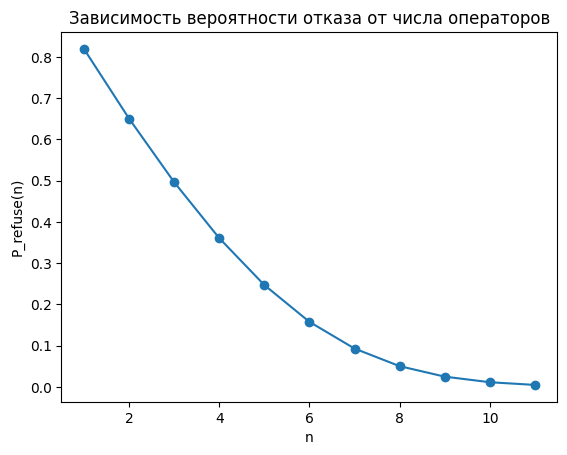

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(N, p_r, marker='o')
ax.set_xlabel('n')
ax.set_ylabel("P_refuse(n)")
plt.title('Зависимость вероятности отказа от числа операторов')

M(N) = <сумма по i от 0 до n> pi*i

n	M(n)
______________________________________
1 	 0.8196721311475408
2 	 1.587714731910463
3 	 2.2888484665549313
4 	 2.9060193262184613
5 	 3.4230731947540063
6 	 3.82915852575695
7 	 4.123504559306523
8 	 4.317721718063554
9 	 4.433276480183634
10 	 4.4950301667109445
11 	 4.524713104790719


Text(0.5, 1.0, 'Зависимость математического ожидания числа занятых операторов от числа операторов')

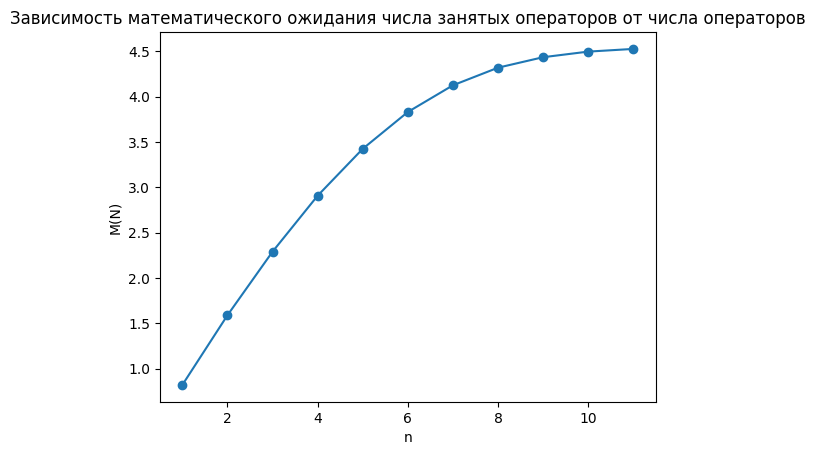

In [ ]:
M_n = []

print("n\tM(n)\n______________________________________")

for n in N:
    m_n = 0
    for i in range(1,n+1):
        pi = pi_no_queue(alpha, mu, i)
        m_n += i * pi
    M_n.append(m_n)
    print(n, '\t', m_n)


fig = plt.figure()
ax = fig.add_subplot()
plt.plot(N, M_n, marker='o')
ax.set_xlabel('n')
ax.set_ylabel("M(N)")
plt.title('Зависимость математического ожидания числа занятых операторов от числа операторов')

Коэффициент загрузки операторов = Q = M(N)/n

n	Q(n)
______________________________________
0 	 0.8196721311475408
1 	 0.7938573659552315
2 	 0.7629494888516438
3 	 0.7265048315546153
4 	 0.6846146389508012
5 	 0.6381930876261583
6 	 0.5890720799009319
7 	 0.5397152147579443
8 	 0.49258627557595935
9 	 0.44950301667109444
10 	 0.4113375549809745


Text(0.5, 1.0, 'Зависимость коэффициента загрузки опреаторов от числа операторов')

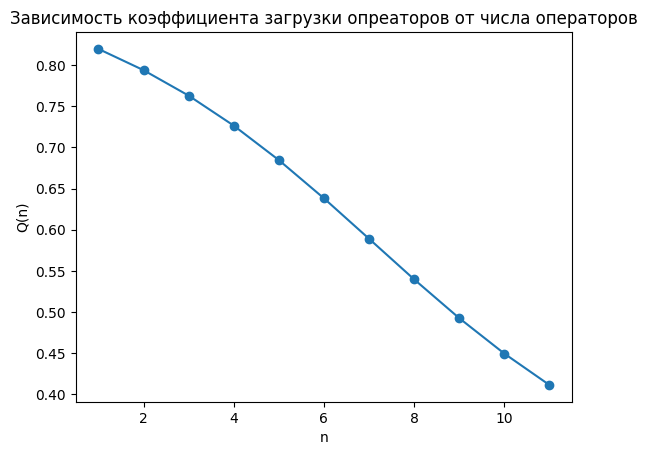

In [ ]:
Q = [M_n[i]/(i+1) for i in range(len(M_n))]


print("n\tQ(n)\n______________________________________")
for i,q in enumerate(Q): print(i, '\t', q)


fig = plt.figure()
ax = fig.add_subplot()
plt.plot(N, Q, marker='o')
ax.set_xlabel('n')
ax.set_ylabel("Q(n)")
plt.title('Зависимость коэффициента загрузки опреаторов от числа операторов')

#1.2
Рассмотреть систему с ограниченной очередью. Варьируя число операторов (вплоть до 20), построить семейства графиков от числа мест в очереди:

* вероятности отказа;
* математического ожидания числа занятых операторов;
* коэффициента загрузки операторов;
* вероятности существования очереди;
* математического ожидания длины очереди;  
* коэффициента занятости мест в очереди.


 Варьируя число место в очереди (вплоть до 20), построить семейства графиков от числа операторов:

* вероятности отказа;
* математического ожидания числа занятых операторов;
* коэффициента загрузки операторов;
* вероятности существования очереди;
* математического ожидания длины очереди;
* коэффициента занятости мест в очереди.

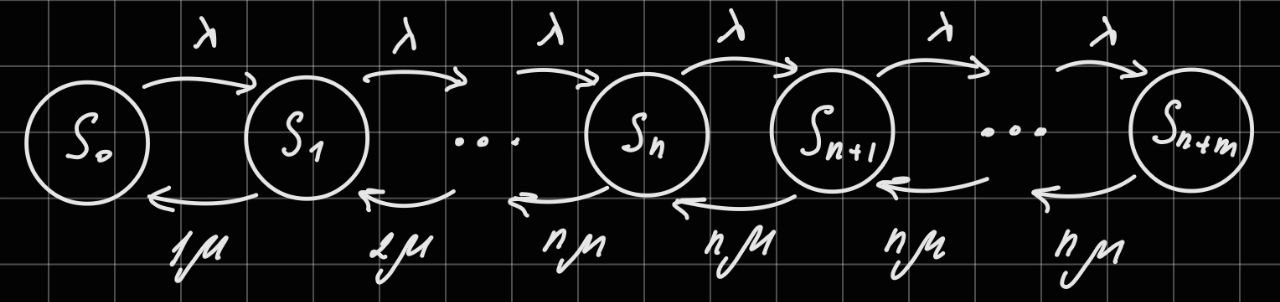

(зависимости от числа мест в очереди)

In [ ]:
def P0(n_operators, n_queue):
    sr = 0
    for i in range(1, n_operators + 1):
        sr += (alpha ** i) / (fact(i) * mu ** i)
    st = 0
    for j in range(1, n_queue + 1):
        st += alpha ** j / (n_operators * mu) ** j
    st *= (alpha ** n_operators / (fact(n_operators) * mu ** n_operators))
    s = sr + st
    return 1 / s


def Pij_fixedQueue(i, j, n_operators, n_queue):
    return (alpha ** (i + j) * P0(n_operators, n_queue)) / \
     (fact(i) * (i ** j) * (mu ** (i + j)))

Text(0.5, 1.0, 'Зависимость вероятности отказа от количества мест в очереди')

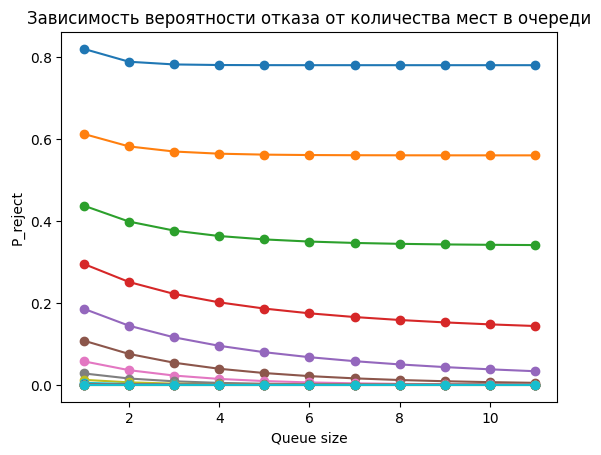

In [ ]:
N = [x for x in range(1,20+1)]

M = [x for x in range(1,11+1)]

P_reject = []

for n in N:
    P_reject.clear()
    for m in M:
        p = Pij_fixedQueue(n, m, n, m)
        P_reject.append(p)
        # print(P_reject)
    plt.plot(M, P_reject, marker='o')


plt.xlabel('Queue size')
plt.ylabel('P_reject')
plt.title('Зависимость вероятности отказа от количества мест в очереди')

In [ ]:
def Mn(n_operators, n_queue):
    mo = 0
    for i in range(1, n_operators + 1):
        mo += i * Pij_fixedQueue(i, 0, n_operators, n_queue)
    for j in range(1, n_queue + 1):
        mo += n_operators * Pij_fixedQueue(n_operators, j, n_operators, n_queue)
    return mo

Text(0.5, 1.0, 'Зависимость матожидания числа занятых операторов от количества мест в очереди')

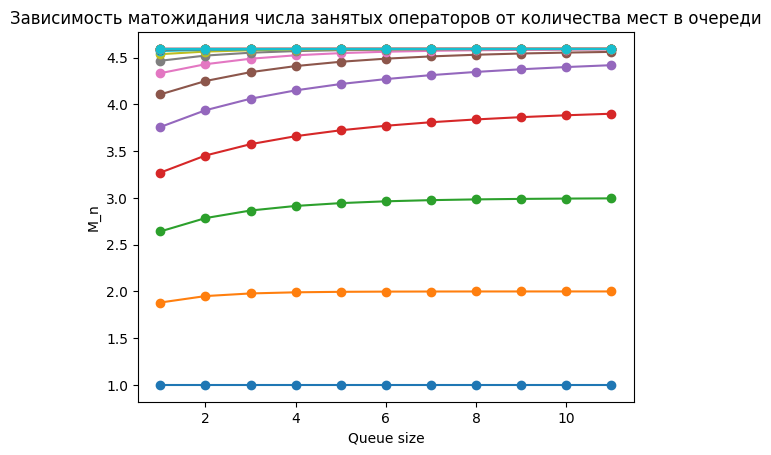

In [ ]:
M_n = []
M = [x for x in range(1,11+1)]


for n_operators in N:
    M_n.clear()
    for n_queue in M:
        M_n.append(Mn(n_operators, n_queue))
    plt.plot(M, M_n, marker='o')


plt.xlabel('Queue size')
plt.ylabel('M_n')
plt.title('Зависимость матожидания числа занятых операторов от количества мест в очереди')

Text(0.5, 1.0, 'Зависимость коэффицента загрузки операторов от количества мест в очереди')

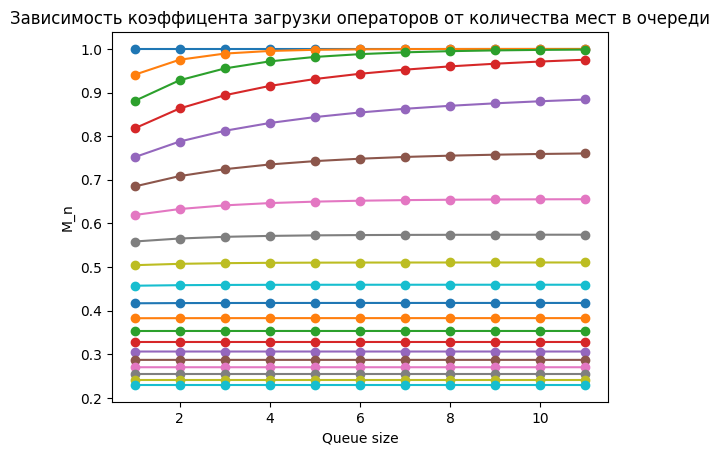

In [ ]:
Q_n = []

for n_operators in N:  # зависимость коэффицента загрузки операторов от количества мест в очереди
    Q_n.clear()
    for n_queue in M:
        Q_n.append(Mn(n_operators, n_queue)/n_operators)
    plt.plot(M, Q_n, marker='o')

plt.xlabel('Queue size')
plt.ylabel('M_n')
plt.title('Зависимость коэффицента загрузки операторов от количества мест в очереди')

Text(0.5, 1.0, 'Зависимость вероятности существования очереди от количества мест в очереди')

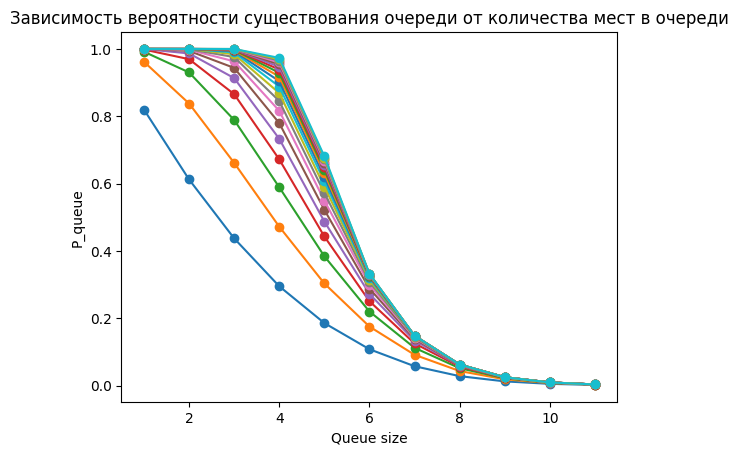

In [ ]:
P_queue = []

for n_queue in N:
    P_queue.clear()
    for n_operators in M:
        summ = 0
        for j in range(1, n_queue + 1):
            summ += Pij_fixedQueue(n_operators, j, n_operators, n_queue)
        P_queue.append(summ)
    plt.plot(M, P_queue, marker='o')

plt.xlabel('Queue size')
plt.ylabel('P_queue')
plt.title('Зависимость вероятности существования очереди от количества мест в очереди')

Text(0.5, 1.0, 'Зависимость математического ожидания длины очереди от количества мест в очереди')

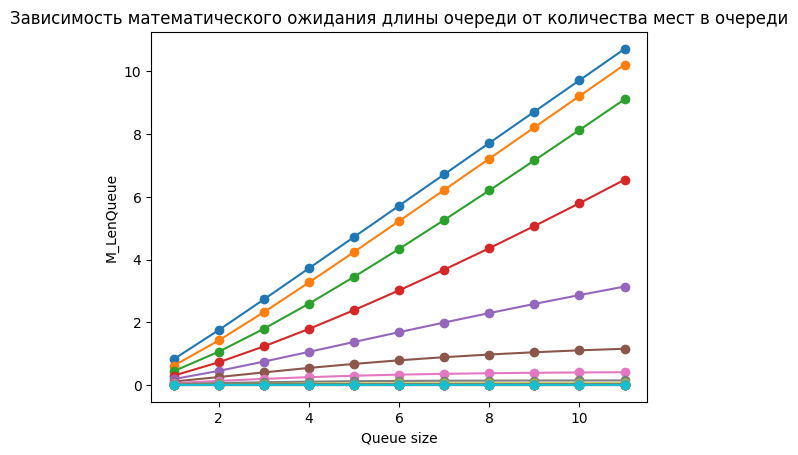

In [ ]:
M_LenQueue = []

for n_operators in N:
    M_LenQueue.clear()
    for n_queue in M:
        M_l = 0
        for j in range(1, n_queue+1):
            M_l += j * Pij_fixedQueue(n_operators, j, n_operators, n_queue)
        M_LenQueue.append(M_l)
    plt.plot(M, M_LenQueue, marker='o')

plt.xlabel('Queue size')
plt.ylabel('M_LenQueue')
plt.title('Зависимость математического ожидания длины очереди от количества мест в очереди')

Text(0.5, 1.0, 'Зависимость коэффициента занятости мест в очереди от количества мест в очереди')

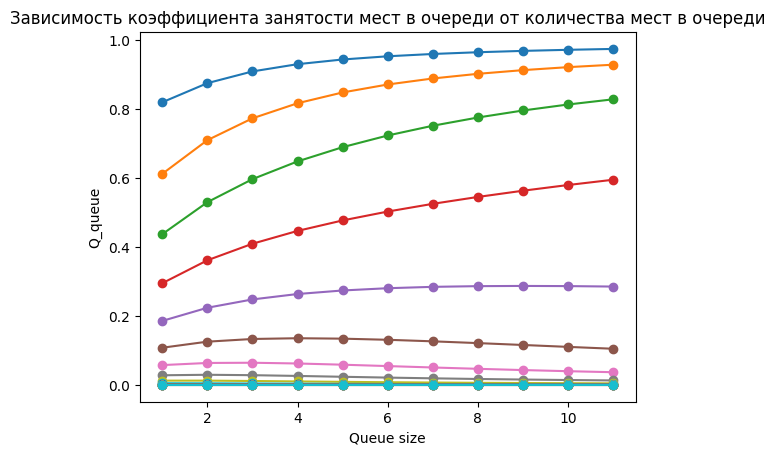

In [ ]:
Q_Queue = []

for n_operators in N:
    Q_Queue.clear()
    for n_queue in M:
        q = 0
        for j in range(1, n_queue+1):
            q += (j * Pij_fixedQueue(n_operators, j, n_operators, n_queue))/n_queue
        Q_Queue.append(q)
    plt.plot(M, Q_Queue, marker='o')

plt.xlabel('Queue size')
plt.ylabel('Q_queue')
plt.title('Зависимость коэффициента занятости мест в очереди от количества мест в очереди')

(зависимости от числа операторов)

Text(0.5, 1.0, 'Зависимость вероятности отказа от количества операторов')

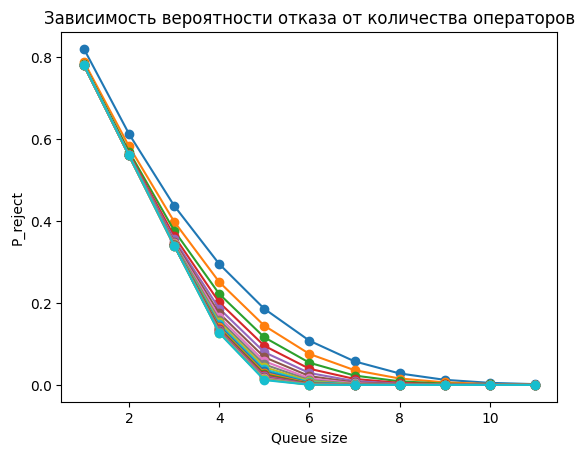

In [ ]:
N = [x for x in range(1,11+1)]

M = [x for x in range(1,20+1)]

P_reject = []

for m in M:
    P_reject.clear()
    for n in N:
        p = Pij_fixedQueue(n, m, n, m)
        P_reject.append(p)
        # print(P_reject)
    plt.plot(N, P_reject, marker='o')


plt.xlabel('Queue size')
plt.ylabel('P_reject')
plt.title('Зависимость вероятности отказа от количества операторов')

Text(0.5, 1.0, 'Зависимость матожидания числа занятых операторов от числа операторов')

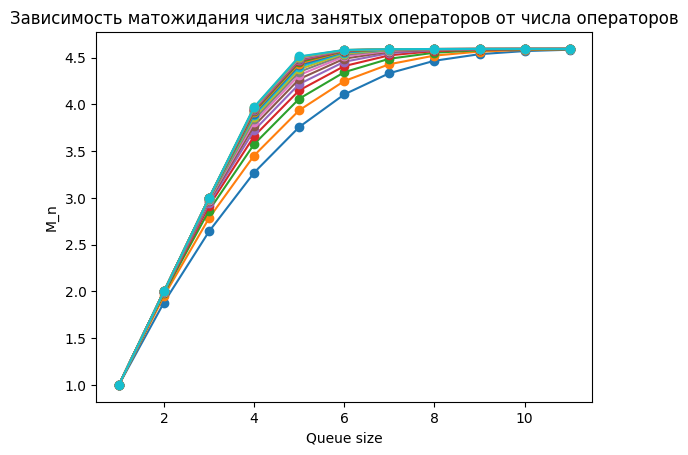

In [ ]:
M_n = []

for n_queue in M:
    M_n.clear()
    for n_operators in N:
        M_n.append(Mn(n_operators, n_queue))
    plt.plot(N, M_n, marker='o')


plt.xlabel('Queue size')
plt.ylabel('M_n')
plt.title('Зависимость матожидания числа занятых операторов от числа операторов')

Text(0.5, 1.0, 'Зависимость коэффицента загрузки операторов от количества операторов')

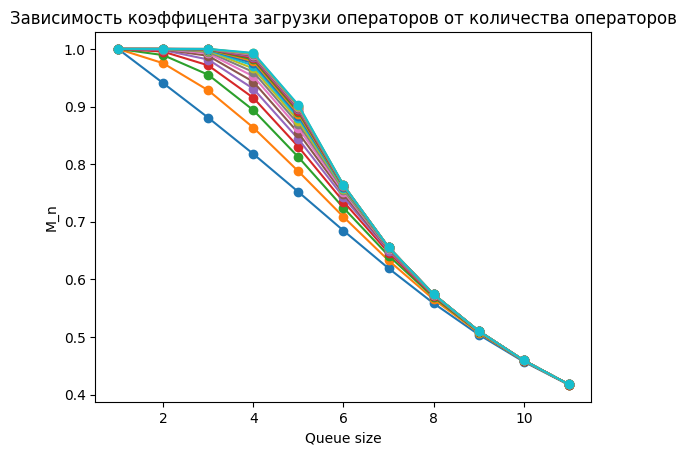

In [ ]:
Q_n = []

for n_queue in M:  # зависимость коэффицента загрузки операторов от количества мест в очереди
    Q_n.clear()
    for n_operators in N:
        Q_n.append(Mn(n_operators, n_queue)/n_operators)
    plt.plot(N, Q_n, marker='o')

plt.xlabel('Queue size')
plt.ylabel('M_n')
plt.title('Зависимость коэффицента загрузки операторов от количества операторов')

Text(0.5, 1.0, 'Зависимость вероятности существования очереди от количества операторов')

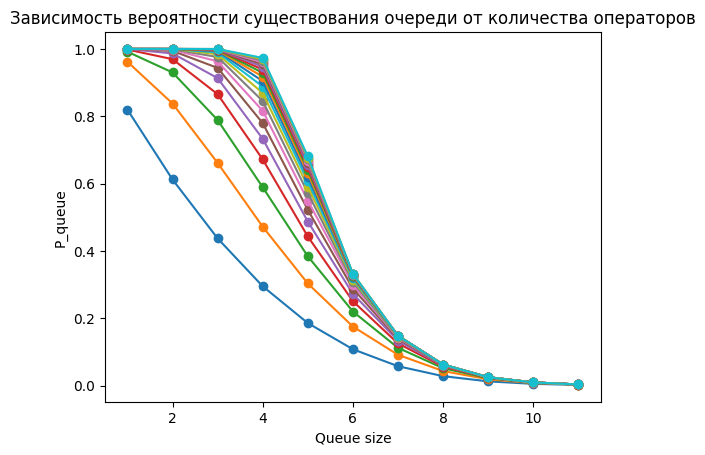

In [ ]:
P_queue = []

for n_queue in M:
    P_queue.clear()
    for n_operators in N:
        summ = 0
        for j in range(1, n_queue + 1):
            summ += Pij_fixedQueue(n_operators, j, n_operators, n_queue)
        P_queue.append(summ)
    plt.plot(N, P_queue, marker='o')

plt.xlabel('Queue size')
plt.ylabel('P_queue')
plt.title('Зависимость вероятности существования очереди от количества операторов')

Text(0.5, 1.0, 'Зависимость математического ожидания длины очереди от количества операторов')

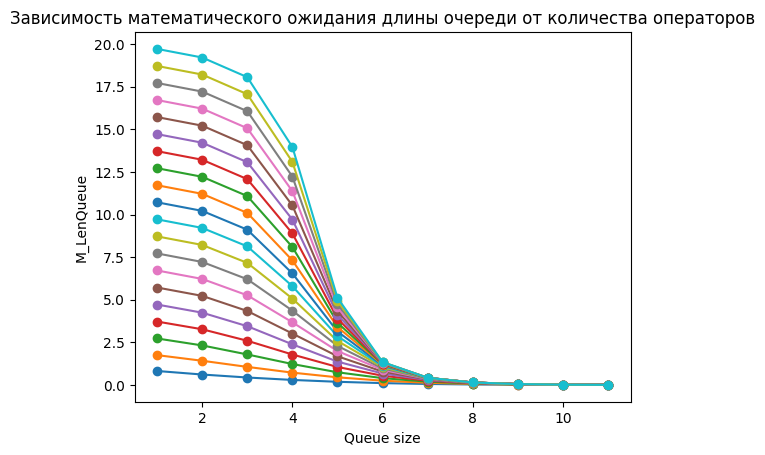

In [ ]:
M_LenQueue = []

for n_queue in M:
    M_LenQueue.clear()
    for n_operators in N:
        M_l = 0
        for j in range(1, n_queue+1):
            M_l += j * Pij_fixedQueue(n_operators, j, n_operators, n_queue)
        M_LenQueue.append(M_l)
    plt.plot(N, M_LenQueue, marker='o')

plt.xlabel('Queue size')
plt.ylabel('M_LenQueue')
plt.title('Зависимость математического ожидания длины очереди от количества операторов')

Text(0.5, 1.0, 'Зависимость коэффициента занятости мест в очереди от количества операторов')

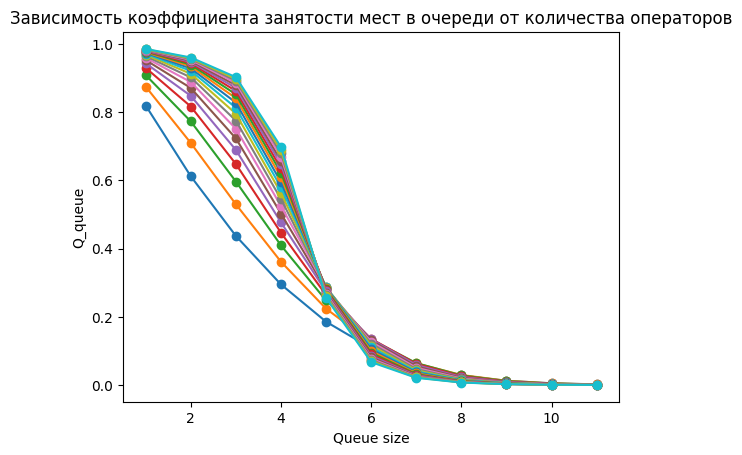

In [ ]:
Q_Queue = []

for n_queue in M:
    Q_Queue.clear()
    for n_operators in N:
        q = 0
        for j in range(1, n_queue+1):
            q += (j * Pij_fixedQueue(n_operators, j, n_operators, n_queue))/n_queue
        Q_Queue.append(q)
    plt.plot(N, Q_Queue, marker='o')

plt.xlabel('Queue size')
plt.ylabel('Q_queue')
plt.title('Зависимость коэффициента занятости мест в очереди от количества операторов')

#1.3

Рассмотреть систему без ограничений на длину очереди. Построить графики от числа операторов (вплоть до 20):

* математического ожидания числа занятых операторов;
* коэффициента загрузки операторов;
* вероятности существования очереди;
* математического ожидания длины очереди.

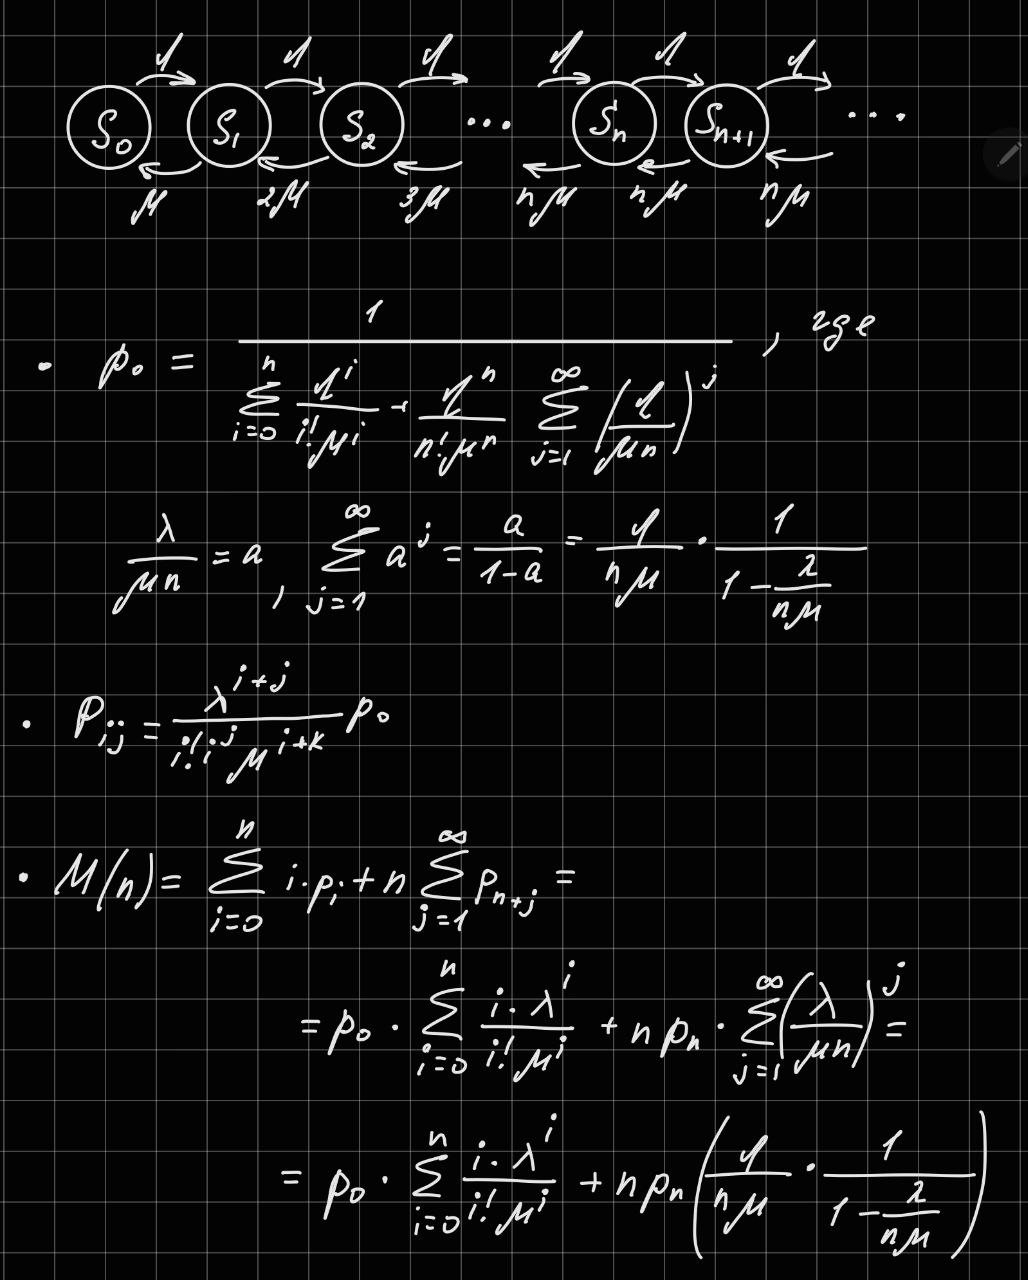

In [ ]:
def P0_infiniteQueue(n_operators):
    den = 0
    p = alpha/mu

    for i in range(n_operators + 1):
        den += p**i/fact(i)

    den += (p**n_operators/fact(n_operators))*(p/(n_operators-p))

    return 1/den

def M_infiniteQueue(n_operators, p0, pn):

    m = 0

    p = alpha/mu

    for i in range(n_operators + 1):
        m += i * p0* p**i/fact(i)

    m += n_operators * pn * (p/(n_operators-p))

    return m

Text(0.5, 1.0, 'Зависимость математического ожидания числа занятых операторов от числа операторов')

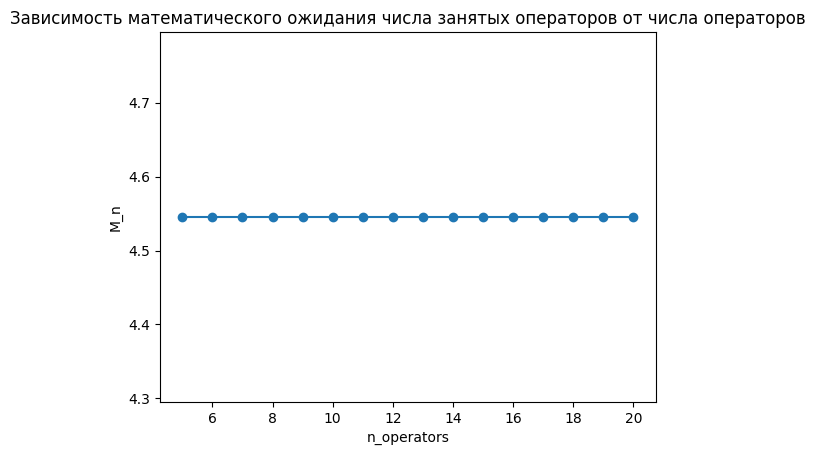

In [ ]:
N = [x for x in range(5,20 + 1)]
M_n=[]

p = alpha/mu

for n_operators in N:
    p0 = P0_infiniteQueue(n_operators)

    pn = p**n_operators/fact(n_operators) * p0

    m = M_infiniteQueue(n_operators, p0, pn)

    M_n.append(m)


plt.plot(N, M_n, marker='o')

plt.xlabel('n_operators')
plt.ylabel('M_n')
plt.title('Зависимость математического ожидания числа занятых операторов от числа операторов')

Text(0.5, 1.0, 'Зависимость коэффициента загрузки операторов от числа операторов')

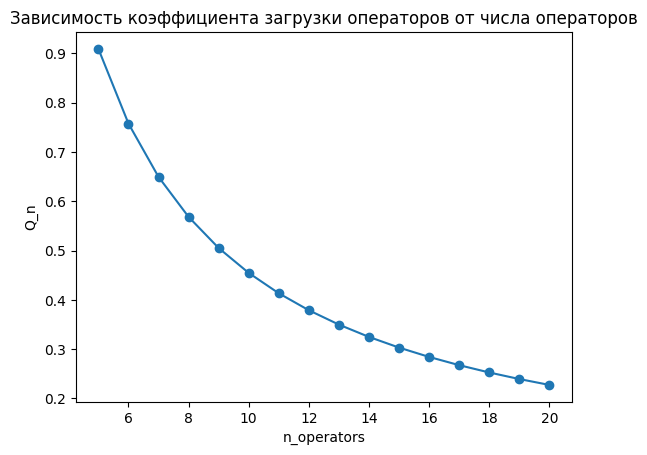

In [ ]:
Q_n=[]
N = [x for x in range(5,20 + 1)]

p = alpha/mu

for n_operators in N:

    p0 = P0_infiniteQueue(n_operators)
    pn = p**n_operators/fact(n_operators) * p0

    m = M_infiniteQueue(n_operators, p0, pn)

    Q_n.append(m/n_operators)


plt.plot(N, Q_n, marker='o')

plt.xlabel('n_operators')
plt.ylabel('Q_n')
plt.title('Зависимость коэффициента загрузки операторов от числа операторов')



Text(0.5, 1.0, 'Зависимость вероятности очереди от числа операторов')

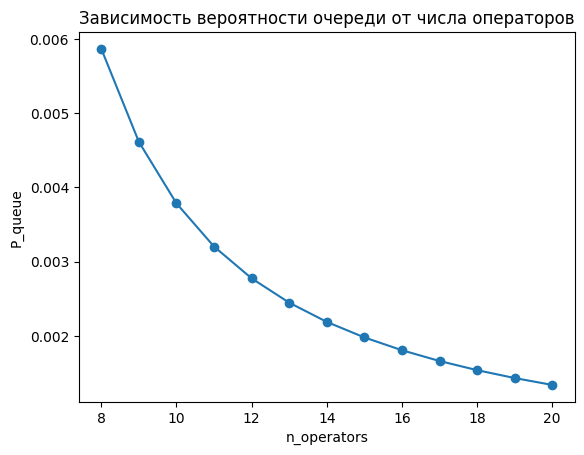

In [ ]:
P_queue = []
N = [x for x in range(8,20 + 1)]

p = alpha/mu

for n_operators in N:

    a = alpha / (mu * n_operators)

    p0 = P0_infiniteQueue(n_operators)

    pn = p**n/fact(n) * p0

    P_queue.append(pn * (p/(n_operators-p)))

plt.plot(N, P_queue, marker='o')

plt.xlabel('n_operators')
plt.ylabel('P_queue')
plt.title('Зависимость вероятности очереди от числа операторов')


Text(0.5, 1.0, 'Зависимость математического ожидания длины очереди от числа операторов')

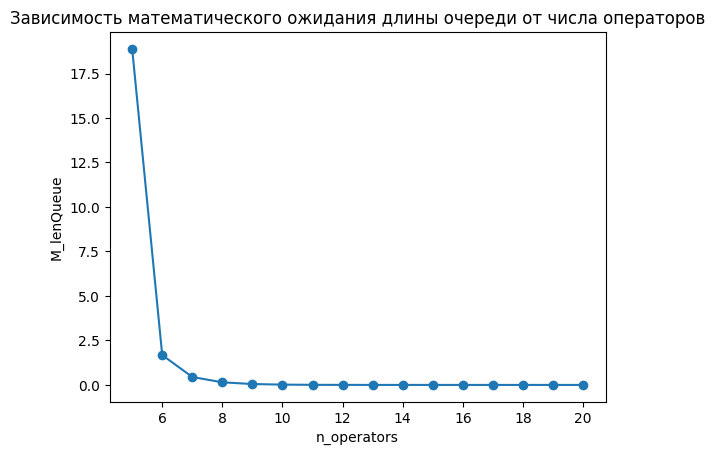

In [ ]:
N = [x for x in range(5,20 + 1)]
M_lenQueue=[]

for n in N:

    p0 = P0_infiniteQueue(n_operators)
    pn = p**n/fact(n) * p0

    M_lenQueue.append(pn * (p/n/((1-p/n)**2)))

plt.plot(N, M_lenQueue, marker='o')

plt.xlabel('n_operators')
plt.ylabel('M_lenQueue')
plt.title('Зависимость математического ожидания длины очереди от числа операторов')


#1.4


Рассмотреть систему без ограничений на длину очереди, учитывающей фактор ухода клиентов из очереди (среднее приемлемое время ожидания – Tw = R1+G1+B1+R2+G2+B2+R3+G3+B3 секунд). Построить графики от числа операторов (вплоть до 20): математического ожидания числа занятых операторов; коэффициента загрузки операторов; вероятности существования очереди; математического ожидания длины очереди.

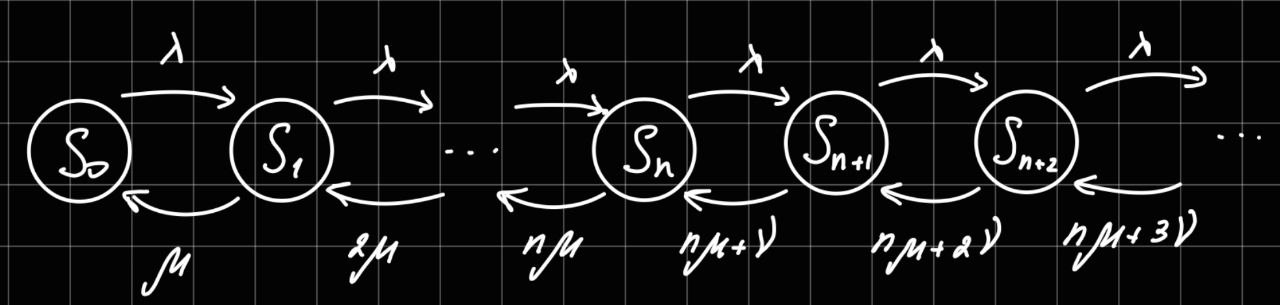

In [ ]:
from math import prod

Tw = r1 + g1 + b1 + r2 + g2 + b2 + r3 + g3 + b3
lam = alpha
p = lam/mu

v = 1/Tw

In [ ]:
def P0_infinityqueueWithLeaving(n):

    sum1 = 0

    for i in range(n+1):
        sum1 += p**i/fact(i)

    sum2 = 0

    for j in range(1,100):
        a = [alpha/(n * mu + 1/75 * l) for l in range(1, j + 1)]
        sum2 += prod(a)

    return 1/(sum1 + p**n/fact(n)*sum2)

def Mn_infinityqueueWithLeaving(n, p0, pn):

    sum1 = 0

    for i in range(n+1):
        sum1 += i * p**i/fact(i)

    sum2 = 0

    for j in range(1,100):
        a = [lam/(n * mu + 1/75 * l) for l in range(1, j + 1)]
        sum2 += prod(a)


    return p0 * sum1 + n * pn * sum2


Text(0.5, 1.0, 'Зависимость математического ожидания числа занятых операторов от числа операторов')

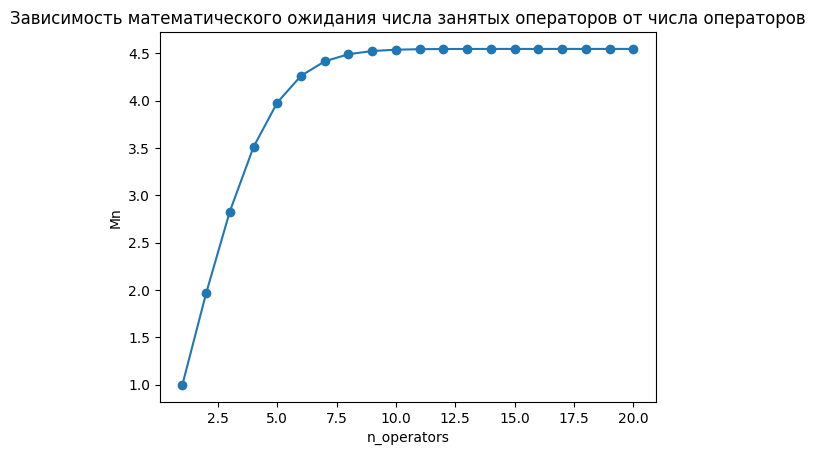

In [ ]:
N = [x for x in range(1,20 + 1)]
Mn = []

for n in N:
    p0 = P0_infinityqueueWithLeaving(n)

    pn = p**n/fact(n) * p0

    m = Mn_infinityqueueWithLeaving(n, p0, pn)

    Mn.append(m)

plt.plot(N, Mn, marker='o')

plt.xlabel('n_operators')
plt.ylabel('Mn')
plt.title('Зависимость математического ожидания числа занятых операторов от числа операторов')


Text(0.5, 1.0, 'Зависимость коэффициента загрузки операторов от числа операторов')

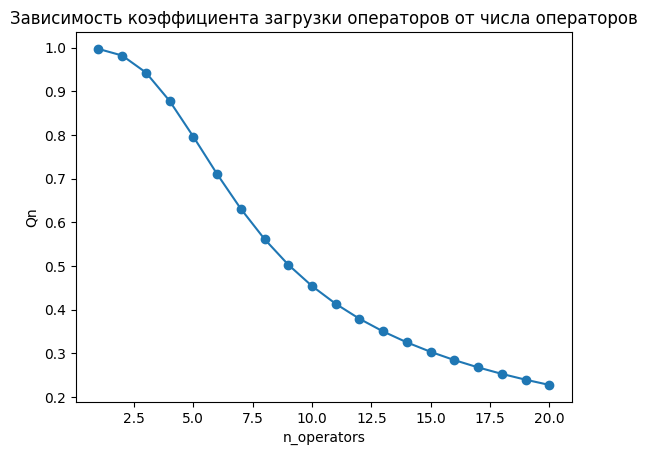

In [ ]:
N = [x for x in range(1,20 + 1)]
Qn = []

for n in N:
    p0 = P0_infinityqueueWithLeaving(n)

    pn = p**n/fact(n) * p0

    m = Mn_infinityqueueWithLeaving(n, p0, pn)

    Qn.append(m/n)

plt.plot(N, Qn, marker='o')

plt.xlabel('n_operators')
plt.ylabel('Qn')
plt.title('Зависимость коэффициента загрузки операторов от числа операторов')

In [ ]:
def P_queue(p0, i, k):
    res = alpha**i / (fact(i) * mu**i) * p0
    for j in range(1, k+1):
        res *= alpha / (i*mu + j*v)
    return res


def P0_infinityqueueWithLeaving_(n):

    sum1 = 0

    for i in range(n+1):
        sum1 += p**i/fact(i)

    sum2 = 0
    for j in range(1,100):
        a = [alpha / (n * mu + v * l) for l in range(1, j + 1)]
        sum2 += prod(a)

    return 1 / (sum1 + p ** n / fact(n) * sum2)


def P_ochered_infinityQueueWithLeaving(n):
    ver_och = 0
    for i in range(1, n+1):

        pi = alpha**i * p0 / (fact(i) * mu**i)
        ver_och += pi

    return (1 - ver_och)


Text(0.5, 1.0, 'Зависимость вероятности очереди от числа операторов')

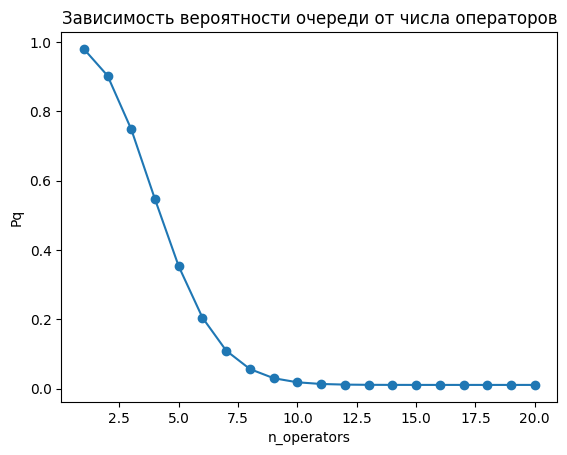

In [ ]:
N = [x for x in range(1,20 + 1)]
Pq = []


for n in range(1, 21):
    p0 = P0_infinityqueueWithLeaving_(n)
    pn = [p0]

    p_och = P_ochered_infinityQueueWithLeaving(n)

    Pq.append(p_och)


plt.plot(N, Pq, marker='o')

plt.xlabel('n_operators')
plt.ylabel('Pq')
plt.title('Зависимость вероятности очереди от числа операторов')

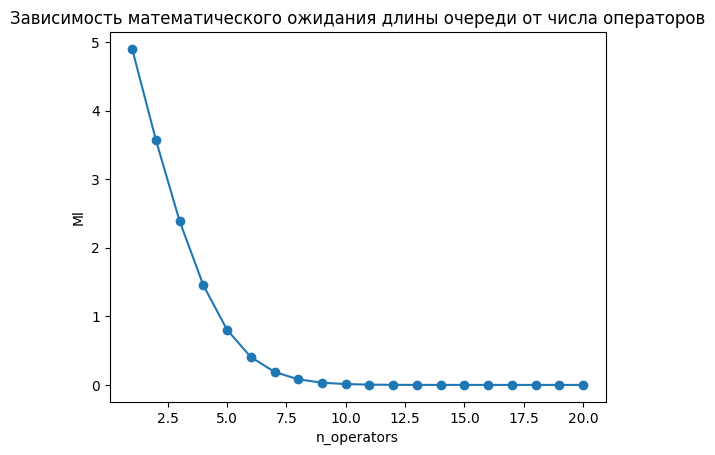

In [ ]:
N = [x for x in range(1,20 + 1)]
Ml = []

for n in range(1, 21):
    p0 = P0_infinityqueueWithLeaving_(n)
    pn = [p0]
    length = 0

    for i in range(1, n+1):
        pi = alpha**i * p0 / (fact(i) * mu**i)
        pn.append(pi)

    for j in range(n+1, n+50+1):
        pn.append(P_queue(p0, n, j-n))
        length += (j-n) * pn[j]

    Ml.append(length)

plt.plot(N, Ml, marker='o')

plt.xlabel('n_operators')
plt.ylabel('Ml')
plt.title('Зависимость математического ожидания длины очереди от числа операторов')
plt.show()

#Задача №2. Проектирование производственного участка

Имеется участок с N = G1+B1+R2+B2+R3+G3 станками. Среднее время между наладками составляет Tc = R1+G1+B1+R2+G2+B2+R3+G3+B3 минут, среднее время наладки – Ts = R1+G1+G2+B2+B3+R3 минут. Все потоки случайных событий считать пуассоновскими. Построить графики от числа наладчиков: математического ожидания числа простаивающих станков; математического ожидания числа станков, ожидающих обслуживания;  вероятности ожидания обслуживания; математического ожидания числа занятых наладчиков; коэффициента занятости наладчиков.

In [ ]:
n_stankov = g1+b1+r2+b2+r3+g3

Tc = r1+g1+b1+r2+g2+b2+r3+g3+b3
Ts = r1+g1+g2+b2+b3+r3

alpha = 1/Tc
mu = 1/Ts
p = alpha/mu

In [ ]:
from math import factorial

def Pn(n, m, p):
    mas1 = [factorial(m) / factorial(m - k) / factorial(k) * p**k for k in range(n+1)]
    mas2 = [factorial(m) / factorial(m - n - i) / n**i / factorial(n) * p**(n+i) for i in range(1, m - n + 1)]
    mas  = mas1 + mas2
    p_0 = 1/(sum(mas))
    return [x*p_0 for x in mas]

def M_prostoy(n, m, P):
    return sum([P[i]*i for i in range(m+1)])

def M_service(n, m, P):
    return sum([P[n+i]*i for i in range(1,m-n+1)])

def M_busy_adjuster(n, m, P):
    return sum([P[i]*min(i,n) for i in range(m+1)])

Text(0.5, 1.0, 'Зависимость математического ожидания числа простаивающих станков от числа наладчиков')

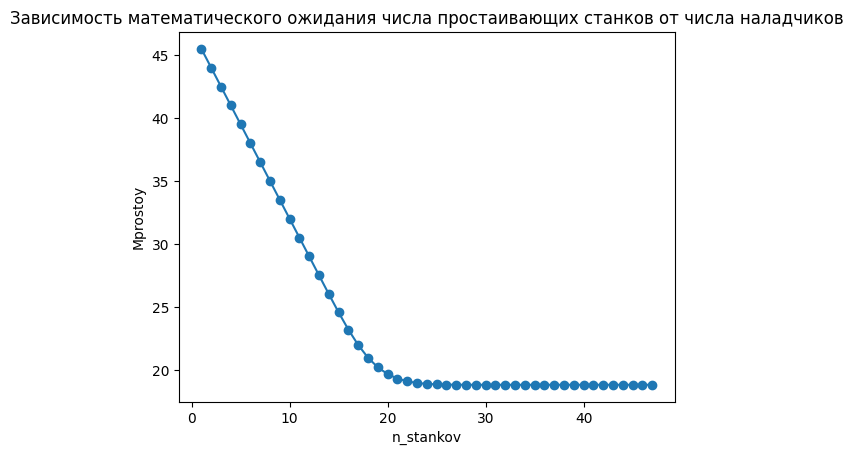

In [ ]:
N  = [x for x in range(1, n_stankov+1)]
Mpr = []

for n in N:
    pn = Pn(n, n_stankov, p)

    Mpr.append(M_prostoy(n, n_stankov, pn))

plt.plot(N, Mpr, marker='o')

plt.xlabel('n_stankov')
plt.ylabel('Mprostoy')
plt.title('Зависимость математического ожидания числа простаивающих станков от числа наладчиков')

Text(0.5, 1.0, 'Зависимость математического ожидания числа станков, ожидающих обслуживания от числа наладчиков')

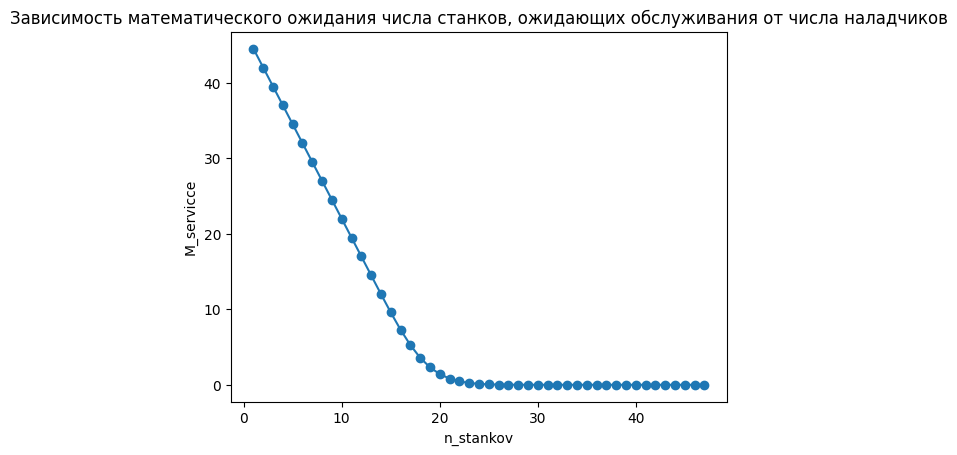

In [ ]:
N  = [x for x in range(1, n_stankov+1)]
Mservice = []

for n in N:
    pn = Pn(n, n_stankov, p)

    Mservice.append(M_service(n, n_stankov, pn))

plt.plot(N, Mservice, marker='o')

plt.xlabel('n_stankov')
plt.ylabel('M_servicce')
plt.title('Зависимость математического ожидания числа станков, ожидающих обслуживания от числа наладчиков')

Text(0.5, 1.0, 'Зависимость вероятности ожидания обслуживания от числа наладчиков')

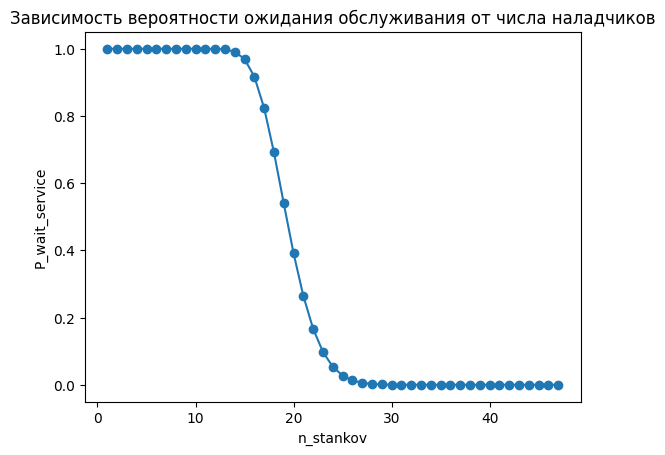

In [ ]:
N  = [x for x in range(1, n_stankov+1)]
Pob = []

for n in N:
    pn = Pn(n, n_stankov, p)

    Pob.append(sum(pn[n+1:n_stankov + 1]))

plt.plot(N, Pob, marker='o')

plt.xlabel('n_stankov')
plt.ylabel('P_wait_service')
plt.title('Зависимость вероятности ожидания обслуживания от числа наладчиков')

Text(0.5, 1.0, 'Зависимость математического ожидания числа занятых наладчиков от числа наладчиков')

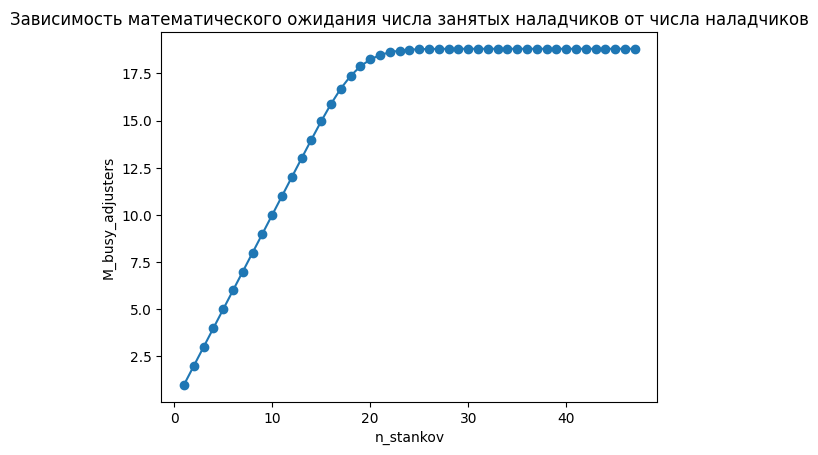

In [ ]:
N  = [x for x in range(1, n_stankov+1)]
Mbadj = []

for n in N:
    pn = Pn(n, n_stankov, p)

    Mbadj.append(M_busy_adjuster(n, n_stankov, pn))

plt.plot(N, Mbadj, marker='o')

plt.xlabel('n_stankov')
plt.ylabel('M_busy_adjusters')
plt.title('Зависимость математического ожидания числа занятых наладчиков от числа наладчиков')

Text(0.5, 1.0, 'Зависимость коэффициента занятости наладчиков от числа наладчиков')

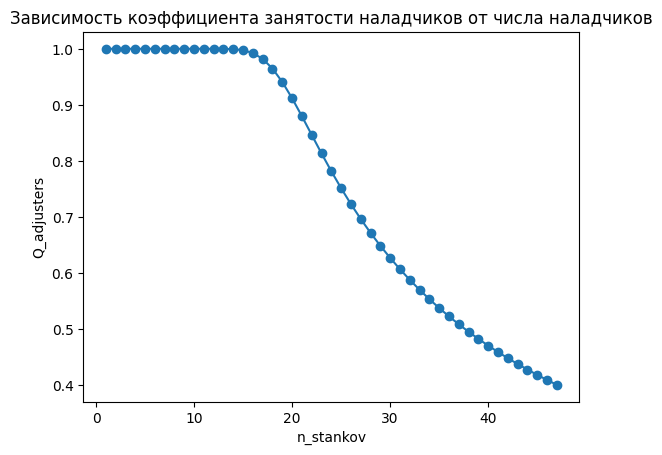

In [ ]:
N  = [x for x in range(1, n_stankov+1)]
Q = []

for n in N:
    pn = Pn(n, n_stankov, p)

    Q.append(M_busy_adjuster(n, n_stankov, pn)/n)

plt.plot(N, Q, marker='o')

plt.xlabel('n_stankov')
plt.ylabel('Q_adjusters')
plt.title('Зависимость коэффициента занятости наладчиков от числа наладчиков')